# Drawing from Probability Distributions
A key part of any Monte Carlo simulation is drawing random numbers from known distributions. We model certain physical systems according to various statistical behaviors characterized by probability distributions. 

# Drawing from non-uniform random distributions

In the previous section we learned how to generate random numbers from
a uniform probability distribution in an interval $[a,b]$. This
distribution was normalized, so that $$\int _a^b {P(x)dx}=1.$$ Hence, the uniform distribution *by definition* is
$P(x)=1/(b-a)$.

Now, suppose that we generate a sequence $\{x_i\}$ and we take some
function of it to generate $\{y(x_i)\}=\{y_i\}$. This new sequence is
going to be distributed according to some probability density $P(y)$,
such that $$P(y)dy=P(x)dx$$ or $$P(y)=P(x)\frac{dx}{dy}.$$

If we want to generate a desired normalized distribution $P(y)$ from a uniform distribution $P(x)$, we need
to solve the differential equation: $$\frac{dx}{dy}=P(y).$$ But the
solution of this is $$x=\int _0^y {P(y')dy'}=F(y).$$ $F(y)$ is often called the Cumulative Distribution Function (CDF). Therefore,
$$y(x)=F^{-1}(x),$$ where $F^{-1}$ is the inverse of $F$.

### Example: Exponential distribution

As an example, let us take $y(x)=-\ln{(x)}$ with $P(x)$ representing a
uniform distribution in the interval $[0,1]$. Then
$$P(y)=\frac{dx}{dy}=e^{-y},$$ which is distributed exponentially. This
distribution occurs frequently in real problems such as the radioactive
decay of nuclei. You can also see that the quantity $y/\lambda$ has the
distribution $\lambda
e^{-\lambda y}$.




In [3]:
%matplotlib qt
import pie
pie.piestimator(1000)

3.224

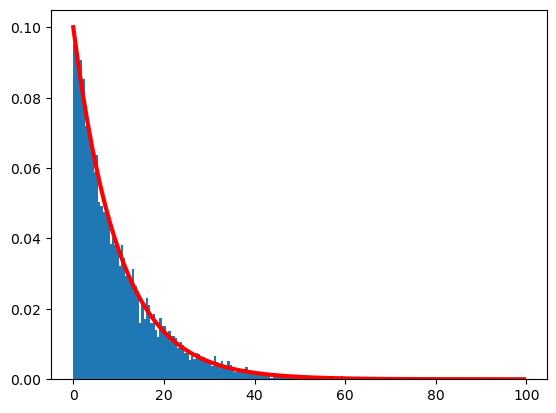

In [5]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 10000
# draw from a uniform distribution
r = np.random.random(N) 

xlambda = 0.1 
x = -np.log(r)/xlambda

binwidth=xlambda*5

pyplot.hist(x,bins=np.arange(0.,100., binwidth),density=True);
pyplot.plot(np.arange(0.,100.,binwidth),xlambda*np.exp(-xlambda*np.arange(0.,100.,binwidth)),ls='-',c='red',lw=3);
pyplot.show()

### Example: Cauchy (Lorentzian) Distribution

The Cauchy distribution, also known as the Lorentzian distribution in physics, is fundamental to understanding resonance phenomena. It appears in nuclear magnetic resonance, spectral line broadening, and particle physics as the relativistic Breit-Wigner distribution that describes unstable particle masses (as we'll see later in this notebook).

The Cauchy distribution is given by:
$$P(y) = \frac{1}{\pi} \frac{\gamma}{(y-y_0)^2 + \gamma^2}$$

where $y_0$ is the location parameter (the peak position) and $\gamma$ is the scale parameter (half-width at half-maximum). This distribution is notable because it has no defined mean or variance—the integrals diverge!

To generate random numbers from this distribution using the inverse transform method, we need to find the cumulative distribution function and then invert it.

The CDF is:
$$F(y) = \int_{-\infty}^{y} P(y') dy' = \frac{1}{\pi}\arctan\left(\frac{y-y_0}{\gamma}\right) + \frac{1}{2}$$

Setting $F(y) = x$ where $x$ is uniformly distributed on $[0,1]$, we solve for $y$:
$$x = \frac{1}{\pi}\arctan\left(\frac{y-y_0}{\gamma}\right) + \frac{1}{2}$$

$$\pi\left(x - \frac{1}{2}\right) = \arctan\left(\frac{y-y_0}{\gamma}\right)$$

$$\frac{y-y_0}{\gamma} = \tan\left[\pi\left(x - \frac{1}{2}\right)\right]$$

Therefore:
$$y(x) = y_0 + \gamma \tan\left[\pi\left(x - \frac{1}{2}\right)\right]$$

This is our transformation from uniform random numbers $x$ to Cauchy-distributed random numbers $y$.


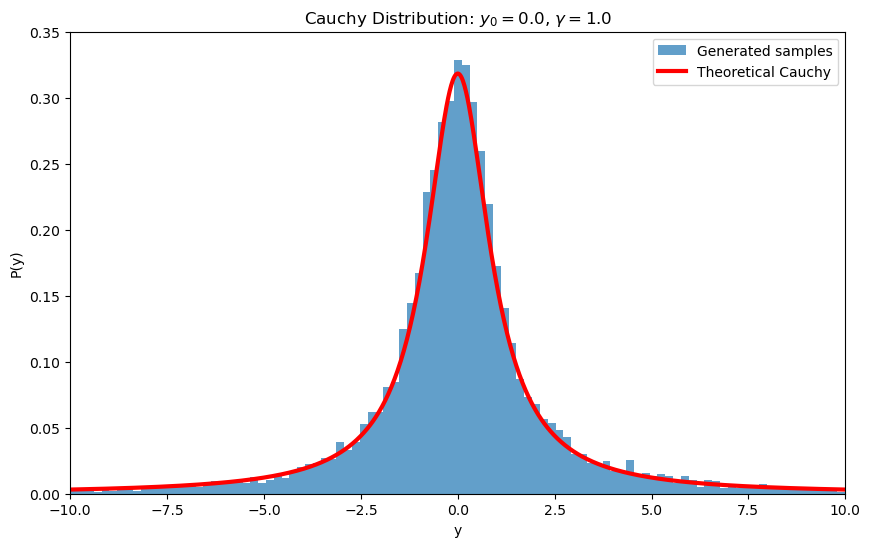

In [6]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 10000
# draw from a uniform distribution
r = np.random.random(N) 

# Parameters for Cauchy distribution
y0 = 0.0     # location (peak position)
gamma = 1.0  # scale (half-width at half-maximum)

# Apply inverse transform
y = y0 + gamma * np.tan(np.pi * (r - 0.5))

# Plot histogram with theoretical curve
# Note: we clip the range for visualization since Cauchy has heavy tails
plot_range = np.linspace(-10, 10, 1000)
theoretical = (1/np.pi) * gamma / ((plot_range - y0)**2 + gamma**2)

pyplot.figure(figsize=(10, 6))
pyplot.hist(y, bins=np.linspace(-10, 10, 100), density=True, alpha=0.7, label='Generated samples')
pyplot.plot(plot_range, theoretical, 'r-', lw=3, label='Theoretical Cauchy')
pyplot.xlim(-10, 10)
pyplot.ylim(0, 0.35)
pyplot.xlabel('y')
pyplot.ylabel('P(y)')
pyplot.legend()
pyplot.title(f'Cauchy Distribution: $y_0={y0}$, $\\gamma={gamma}$')
pyplot.show()

**Physical Interpretation:** In spectroscopy, $y$ would represent the frequency or energy of an emitted photon, $y_0$ is the resonance frequency, and $\gamma$ is related to the natural linewidth and lifetime of the excited state through the energy-time uncertainty relation $\Delta E \cdot \tau \sim \hbar$, where $\tau \sim 1/\gamma$. The heavy tails of the Cauchy distribution (much heavier than a Gaussian) reflect the quantum mechanical uncertainty in energy for short-lived states.

**Special Note:** The Cauchy distribution doesn't have a well-defined mean. We can see that if we try to calculate a mean for larger and larger samples.

In [14]:
# Watch the "mean" fail to converge
sample_sizes = [100, 1000, 10000, 100000]
for N in sample_sizes:
    r = np.random.random(N)
    y = gamma * np.tan(np.pi * (r - 0.5))
    print(f"N = {N:6d}, 'mean' = {np.mean(y):8.2f}")

N =    100, 'mean' =  -231.25
N =   1000, 'mean' =     0.84
N =  10000, 'mean' =    29.19
N = 100000, 'mean' =     0.38


# Drawing random numbers from distributions
You can draw random numbers from known distributions by using a subpackage of `scipy` called [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) or using the `random` package. `scipy.stats` contains functions relating to statistical tests and statistical distributions, both continuous and discrete. Keep this package in mind!

Here is small program that models the decay of Thallium to Lead.

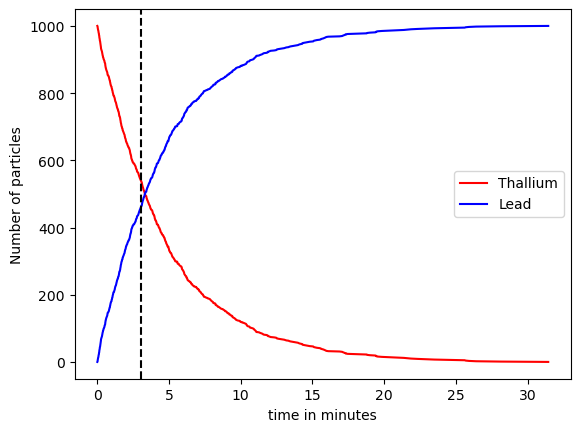

In [20]:
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as mp
#Script models the decay of 1000 Thallium atoms to lead by drawing from a nonuniform probability distribution
NT = 1000;
NPb = 0
#lifetime of Thallium in minutes
lifetime = 3.053/np.log(2) 

# draw exp distribution to produce a Monte Carlo Simulation
from scipy.stats import expon
#draw from exponential distribution
data_expon = expon.rvs(scale=lifetime,loc=0,size=1000)
#decays happen at random points according to exponential distribution
timepoints = np.sort(data_expon)
Tpoints = np.linspace(NT,0,NT)
Pbpoints = np.linspace(0,NT,NT)
mp.plot(timepoints,Tpoints,'r',label="Thallium")
mp.plot(timepoints,Pbpoints,'b',label="Lead")
mp.axvline(x=lifetime*np.log(2), color='k', linestyle='--')
mp.xlabel("time in minutes")
mp.ylabel("Number of particles")
mp.legend()
mp.show()

# Particle Physics
Many of the particles produced at accelerators like the Large Hadron Collider (LHC), Fermilab, and the Relativistic Heavy Ion Collider (RHIC) are classified as "resonances". In practical terms resonances are just unstable particles, that is particles that decay. These resonances are subject to the energy-time uncertainty principle $$\Delta E \Delta t \sim \hbar$$ that is, the mass of resonances take a range of possible values depending on their lifetime. 

The mass values of resonances are modeled using a Breit-Wigner distribution:
$$f(E) = \frac{k}{(E^2-M^2)^2 + \Gamma^2 M^2}$$
where
$$k = \frac{2\sqrt{2}M\Gamma\gamma}{\pi(M^2+\gamma)},\quad \gamma = \sqrt{M^2(M^2+\Gamma^2)}$$
where *E* is the center of mass energy of the collision, *M* the central mass of the resonance, and $\Gamma$ is the decay width where the lifetime, $\tau$ is $$\tau = \frac{\hbar}{\Gamma}.$$

This should look familiar! The Breit-Wigner distribution is closely related to the Cauchy distribution we saw earlier. In fact, in the non-relativistic limit (when $E \approx M$), the Breit-Wigner reduces to a Cauchy distribution centered at $M$ with width $\Gamma$. This connection makes physical sense: both describe resonance phenomena where the uncertainty principle relates the width of the distribution to the lifetime of the state. Just as we saw that the Cauchy distribution has heavy tails and no defined mean, particle resonances can show up at energies significantly far from their central mass value due to quantum uncertainty.

The package `scipy.stats` contains functions that allow us to draw from Breit-Wigner distributions. This allows us to produce monte carlo simulations of particle interactions, compare the simulations to data, and determine whether physical theories are failing to describe some phenomena.

In [23]:
#magic command to force display of graphics 
%matplotlib inline
import numpy as np
from scipy.stats import rel_breitwigner
import matplotlib.pyplot as mp

In [24]:
#For the Z0 boson
M = 91.1876 #GeV
gamma = 2.4952 #GeV
#the rel_breitwigner distribution takes two parameters
rZ = rel_breitwigner.rvs(M/gamma,scale = gamma, size=1000)
print(rZ)

[ 88.80460058  90.68215618  91.577837    91.23214037  90.06777443
  93.0934551   91.49989425  92.54680355  68.81284166  85.43498976
  92.10314583  92.15900542  90.81375052  88.32296614  91.78721931
 103.96316082  93.1068069   91.45896075  91.1085443   93.02299221
  93.38939214  91.29052312  88.15835473  92.62050979  98.3406616
  90.52366453  95.90183744  91.35941666  93.06901929  92.80471954
  92.37010363  86.43113086  92.24401091  90.18924341  92.65585059
  90.10084057 135.13225433  90.63673214  89.20993703  91.97850643
  37.87284412  89.92338293  91.66846468  92.68664903  91.79265421
  90.47008406  91.87283964  91.45761302  90.81501577  90.3482245
  83.11802255  90.06710665  90.85551537  94.99340819  91.89210178
  91.55508905  92.02654604  92.39231585  91.43854984  95.78192921
  90.80891207  91.29875572  91.03460701  93.65748311  88.06797374
  88.84576142  92.77883679  92.99243267  92.00938182  78.01643125
  93.10009479  91.65802914  90.17083532  90.34911534  93.00949536
  97.0605152

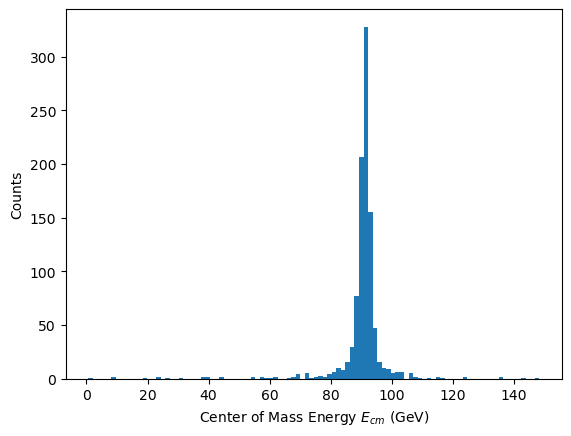

In [26]:
mp.hist(rZ,bins=100)
mp.xlabel('Center of Mass Energy $E_{cm}$ (GeV)')
mp.ylabel('Counts')
mp.show()

In [27]:
# For the Higgs boson
mass = 125.3 #GeV
width = 0.004 #GeV
rho =mass/width
sc = width
rH = rel_breitwigner.rvs(rho,scale =sc, size=1000)
print(rH)

[125.29849222 125.2984389  125.30631775 125.30899495 125.3044819
 125.28196762 125.30048376 125.31127687 125.30268934 125.40424664
 125.30012274 125.29156756 125.30431242 125.30158161 125.29717752
 125.29852842 125.29978353 125.305948   125.30140119 125.29828234
 125.32757299 125.29458256 125.30047582 125.29842961 125.30024976
 125.3010787  125.30371077 125.28862015 125.28203584 125.30100046
 125.29857728 125.29978691 125.30833808 125.27309528 125.29994544
 125.29834746 125.31282307 125.29760678 125.30083074 125.30040905
 125.29895807 125.29133429 125.29233379 125.2985704  125.30575566
 125.30369189 125.30028614 125.30003243 125.3142862  125.29921363
 125.30173085 125.30794981 125.30470456 125.31868711 125.30344879
 125.28756932 125.30139926 125.30008891 125.30064123 125.29818594
 125.30185894 125.30166531 125.29895933 125.30187847 125.29508354
 125.28206658 125.30197749 125.30122543 125.30046526 125.30323655
 125.30067062 125.29995894 125.29448391 125.29496333 125.29479994
 125.306600

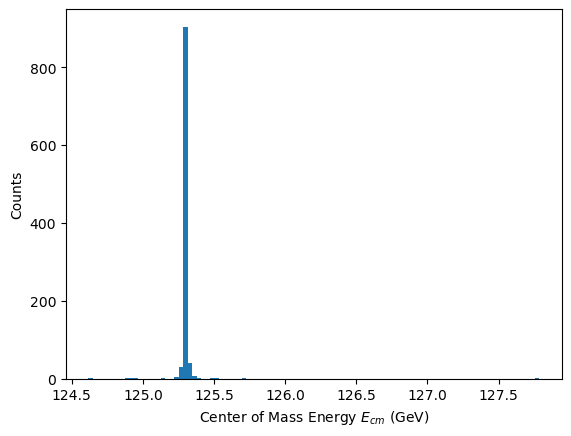

In [28]:
mp.hist(rH,bins=100)
mp.xlabel('Center of Mass Energy $E_{cm}$ (GeV)')
mp.ylabel('Counts')
mp.show()

In [29]:
#combine random lists
rT = np.concatenate((rZ,rH),axis=None)
print(rT)

[ 88.80460058  90.68215618  91.577837   ... 125.30273831 125.30201139
 125.29925926]


In [ ]:
#what the reconstruction from accelerator detectors would look like in an ideal world
mp.hist(rT, bins=100)
mp.xlabel('Center of Mass Energy $E_{cm}$ (GeV)')
mp.ylabel('Counts')
mp.show()

## The key difference between `random` and `numpy.random` and `scipy.stats`
You can draw from the same distributions whether using the `random`, `numpy.random`, or the `scipy.stats` package. The difference comes down to convenience. 'random' package functions tend to only draw 1 number at a time. 

In [30]:
import random as rn
rn.expovariate(lambd = 9)

0.034768493331790766

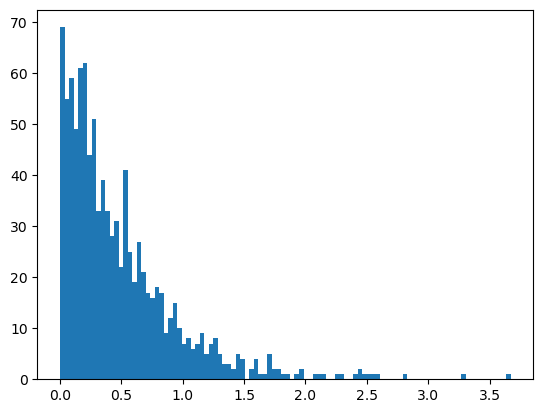

In [31]:
#More machinary is needed to get multiple numbers from expovariate
exp = []
for k in range(1, 1000):
    rando = rn.expovariate(lambd=2)
    exp.append(rando)
mp.hist(exp,bins=100)
mp.show()

# Exercise: Radioactive Decay Simulation

## Background
Carbon-14 is a radioactive isotope used in radiocarbon dating. It has a half-life of 5,730 years. You'll simulate the decay of a sample of C-14 atoms to explore exponential distributions and compare different methods of generating random numbers from distributions.

## Part 1: Manual Transformation Method

**Task:** Generate an exponential distribution using the transformation method from uniform random numbers.

1. Create 5000 uniform random numbers between 0 and 1 using `np.random.random()`
2. Calculate the mean lifetime: τ = 5730/ln(2) years (you'll need `np.log()` for natural log)
3. Transform them to follow an exponential distribution using the formula: `t = -τ * ln(r)`
4. Create a histogram with 50 bins showing the distribution of decay times
5. Add appropriate axis labels ("Time (years)" and "Number of Decays")

**Questions to consider:**
- What does the shape of this distribution tell you about when most decays occur?

## Part 2: Using scipy.stats and Comparison

**Task:** Generate the same exponential distribution using `scipy.stats.expon` and compare

1. Import `expon` from `scipy.stats`
2. Generate 5000 random decay times using `expon.rvs()` with the appropriate `scale` parameter (scale = τ)
3. On the **same plot** as Part 1, add this new histogram with a different color and some transparency (use `alpha=0.5`)
4. Add a legend to distinguish the two methods

**Questions to consider:**
- How do the two histograms compare?
- Which method is more convenient? When might you prefer the manual transformation approach?

## Helpful Code Snippets
```python
# Imports you'll need
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as mp

# Creating overlapping histograms
mp.hist(data1, bins=50, alpha=0.5, label='Manual transformation', color='blue')
mp.hist(data2, bins=50, alpha=0.5, label='scipy.stats', color='red')
mp.legend()
```